<a href="https://colab.research.google.com/github/vallabhpardeshi68/Machine-_learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Authenticate with Google Cloud
from google.colab import auth
auth.authenticate_user()

# STEP 2: Set Google Cloud Project
PROJECT_ID = 'your-project-id'  # Replace with your project ID
!gcloud config set project {PROJECT_ID}

# STEP 3: Upload file from your local machine to Colab
from google.colab import files
uploaded = files.upload()  # Select your file when prompted

# STEP 4: Upload the file to your Google Cloud Storage bucket
FILENAME = list(uploaded.keys())[0]  # Automatically use uploaded filename
BUCKET_NAME = 'your-bucket-name'     # Replace with your GCS bucket name
!gsutil cp {FILENAME} gs://{BUCKET_NAME}/

# STEP 5: (Optional) Download the file back from GCS to Colab
!gsutil cp gs://{BUCKET_NAME}/{FILENAME} .

# STEP 6: (Optional) Read directly from GCS into a DataFrame (e.g. CSV file)
import pandas as pd
df = pd.read_csv(f'gs://{BUCKET_NAME}/{FILENAME}')
df.head()


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
e_val=math.e


data=pd.read_csv('/content/drive/MyDrive/personality_dataone.csv')
featres=["Time_spent_Alone","Stage_fear","Social_event_attendance","Going_outside","Drained_after_socializing","Friends_circle_size"]
col = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'gray', 'cyan', 'magenta', 'black']
x=data.loc[:,featres]
print(x.head())
X=data.loc[:,featres].values

y=data.loc[:,["Personality"]].values
n_samples,n_features=X.shape
weight=np.zeros(n_features)
bias=0
lrnrate=.00001
iterations=10000
X=X.T
for feat in range(n_features):
    plt.scatter(X[feat], y, color=col[feat], label=featres[feat])
    plt.title(featres[feat])
    plt.legend(loc='center')
    plt.xlabel(featres[feat])
    plt.ylabel("introvert")
    plt.show()

X=X.T




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/personality_dataone.csv'

Mounted at /content/drive


In [ ]:
def segmoid(z):
    h=1/(1+(e_val**(-z)))
    return h
def logisticregression(weight,bias,X,y,lrnrate,iterations):
    n_samples,n_features=X.shape
    for _ in range(iterations):
        y_predict=segmoid(np.dot(X,weight.T)+bias)

        error=y_predict-y.T[0]


        dweight=np.dot(X.T,error.T)/n_features

        dbias=np.sum(error.T)/n_features

        weight=weight-(lrnrate*dweight.T)
        bias=bias-lrnrate*dbias
    return weight,bias


In [ ]:
weight,bias=logisticregression(weight,bias,X,y,lrnrate,iterations)






NameError: name 'weight' is not defined

In [ ]:
def predict(X,weight,bias):

    y_predict=segmoid(np.dot(X,weight)+bias)
    arr = (y_predict>= .5).astype(int)
    return y_predict

def predict_with_yes_no(X,weight,bias):

    y_predict=segmoid(np.dot(X,weight)+bias)
    arr = (y_predict>= .5).astype(int)
    return arr

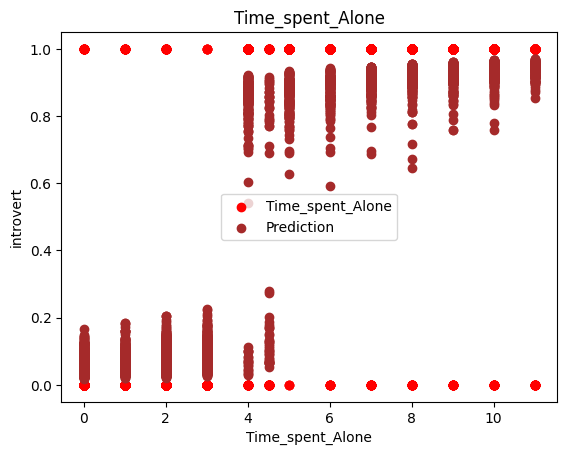

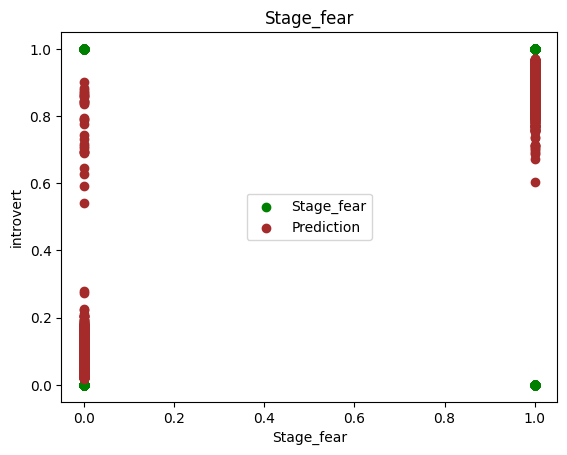

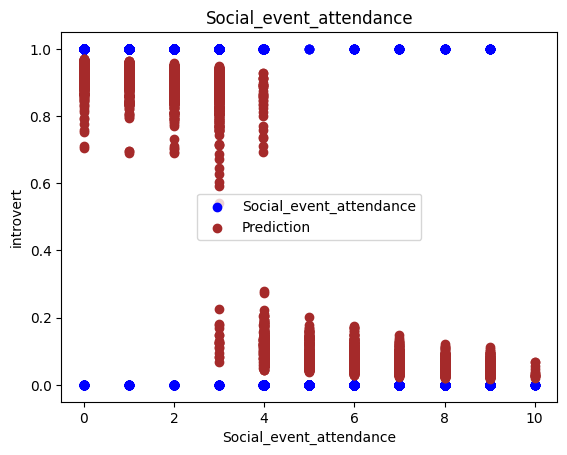

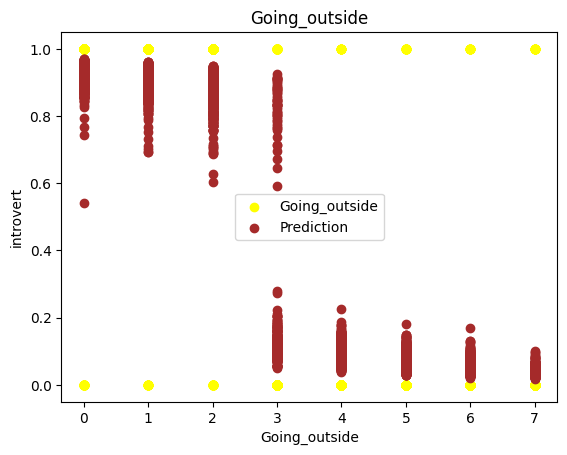

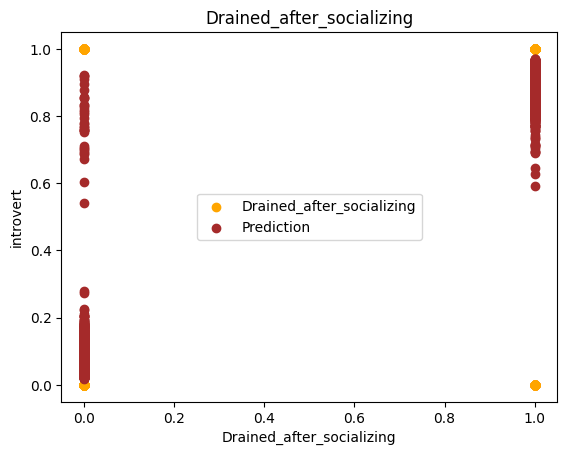

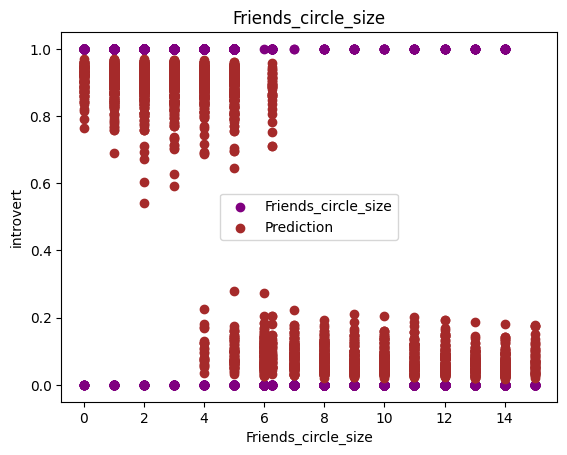

In [ ]:
y_predict=predict(X,weight,bias)
X=X.T
for feat in range(n_features):
    plt.scatter(X[feat], y, color=col[feat], label=featres[feat])
    plt.scatter(X[feat], y_predict, color="brown", label='Prediction')
    plt.title(featres[feat])
    plt.legend(loc='center')
    plt.xlabel(featres[feat])
    plt.ylabel("introvert")
    plt.show()